In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df=pd.read_csv('Supermarket_sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [211]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [212]:
df.shape

(8523, 12)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [214]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [215]:
df.duplicated().sum()

0

In [216]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [217]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [218]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [219]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [220]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [221]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [223]:
df_outlier = df.Item_Outlet_Sales
df_outlier_Q1 = df_outlier.quantile(0.25)
df_outlier_Q3 = df_outlier.quantile(0.75)
df_outlier_IQR = df_outlier_Q3 - df_outlier_Q1
df_outlier_lower = df_outlier_Q1 - (1.5 * df_outlier_IQR)
df_outlier_upper = df_outlier_Q3 + (1.5 * df_outlier_IQR)
(df_outlier_lower,df_outlier_upper)

(-2566.3261, 6501.8699)

In [224]:
index = df.query('Item_Outlet_Sales >= 6501.8699 or Item_Outlet_Sales <= -2566.3261').index

In [225]:
df.drop(index,inplace=True)
df = df.reset_index(drop=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 781.7+ KB


In [227]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   int32  
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   int32  
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   int32  
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   int32  
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   int32  
 9   Outlet_Location_Type       8337 non-null   int32  
 10  Outlet_Type                8337 non-null   int32  
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 553.8 KB


In [229]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [230]:
df.shape

(8337, 12)

# LINEAR REGRESSION MODEL

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=101)

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [236]:
y_pred=lm.predict(X_test)
y_pred

array([1380.67180224,  833.14055582, 2980.54596232, ..., 2610.01911937,
       2098.52273907, 2213.3381478 ])

In [237]:
from sklearn import metrics
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score: 0.492603864054616
MAE: 827.1849070585216
MSE: 1146306.647616066
RMSE: 1070.6571101973152


# DECISION TREE REGRESSOR

In [238]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [239]:
model = DecisionTreeRegressor(random_state=101)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [240]:
y_pred2 = model.predict(X_test)
y_pred2

array([1376.2086,  365.5242, 4364.319 , ..., 1605.9096, 1772.3596,
       1757.712 ])

In [241]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred2)
rmse = sqrt(mse)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.492603864054616
Mean Squared Error: 2011668.7253290955
Root Mean Squared Error: 1418.3330798261372


# RANDOM FOREST REGRESSOR 

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [243]:
model = RandomForestRegressor(n_estimators=100, random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [244]:
y_pred3= model.predict(X_test)
y_pred3

array([1366.447972,  593.400908, 3455.981376, ..., 2287.136186,
       1789.011258, 1857.309022])

In [245]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred3)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.492603864054616
Mean Squared Error: 1044417.6950130105
Root Mean Squared Error: 1021.9675606461344


#  SVR

In [246]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)  
svr_model.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [247]:
y_pred4 = svr_model.predict(X_test)
y_pred4

array([1352.56110075,  707.71483203, 2900.45854422, ..., 2621.90410763,
       1941.12592836, 1916.6911516 ])

In [248]:
r2_svr = r2_score(y_test, y_pred4)
mse_svr = mean_squared_error(y_test, y_pred4)
rmse_svr = sqrt(mse_svr)

print("SVR R2 Score:", r2_svr)
print("SVR Mean Squared Error:", mse_svr)
print("SVR Root Mean Squared Error:", rmse_svr)

SVR R2 Score: 0.46006446745397644
SVR Mean Squared Error: 1219819.4790908876
SVR Root Mean Squared Error: 1104.454380719678


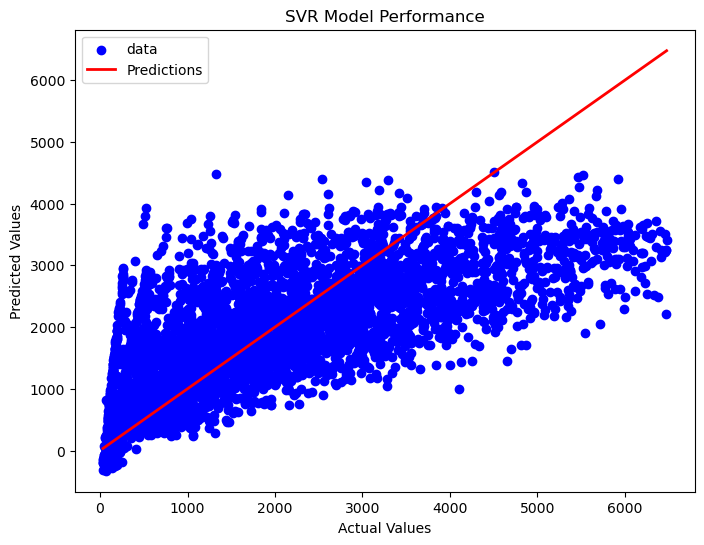

In [249]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred4, c='blue', label='data')
plt.plot([max(y_test), min(y_test)], [max(y_test), min(y_test)], color='red', linewidth=2, label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance')
plt.legend()
plt.show()


# XGBOOST

In [250]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=101)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=101, ...)

In [251]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1535.7946 ,   96.14306, 2852.1733 , ..., 2508.2485 , 1918.625  ,
       1685.2656 ], dtype=float32)

In [252]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)

print("XGBoost R2 Score:", r2_xgb)
print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost Root Mean Squared Error:", rmse_xgb)

XGBoost R2 Score: 0.4790387464613717
XGBoost Mean Squared Error: 1176952.889026354
XGBoost Root Mean Squared Error: 1084.8745959908704


# LIGHTGBM

In [253]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=101)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 4168, number of used features: 11
[LightGBM] [Info] Start training from score 2058.392105


LGBMRegressor(random_state=101)

In [254]:
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb

array([1481.11322755,  664.42365727, 3114.46623516, ..., 2564.0774397 ,
       1956.01301869, 1846.04952246])

In [255]:
r2_lgb = r2_score(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = sqrt(mse_lgb)

print("LightGBM R2 Score:", r2_lgb)
print("LightGBM Mean Squared Error:", mse_lgb)
print("LightGBM Root Mean Squared Error:", rmse_lgb)

LightGBM R2 Score: 0.5498780614587051
LightGBM Mean Squared Error: 1016913.0859192361
LightGBM Root Mean Squared Error: 1008.4210856181242


# CATBOOST

In [256]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
catboost_model = CatBoostRegressor(iterations=100, random_state=101, verbose=0)
catboost_model.fit(X_train, y_train)

In [257]:
y_pred_catboost = catboost_model.predict(X_test)
y_pred_catboost

array([2024.10222391,  270.70625562, 2968.09475535, ..., 2516.68397217,
       2464.00236846, 1796.42505332])

In [258]:
r2_catboost = r2_score(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = sqrt(mse_catboost)

print("CatBoost R2 Score:", r2_catboost)
print("CatBoost Mean Squared Error:", mse_catboost)
print("CatBoost Root Mean Squared Error:", rmse_catboost)

CatBoost R2 Score: 0.5425677789474073
CatBoost Mean Squared Error: 1033428.4372295858
CatBoost Root Mean Squared Error: 1016.5768230830299
